# Fuzzy Expert System

Attributes
- Mean Delay
- Number of Servers
- Repair Utilization Factor
- Number of Spares

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4c7c6ecbb7c116fc08e749adbf1b854e2cff129fea173eda7ad10928199b0639
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
# importing libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [3]:
m = ctrl.Antecedent(np.arange( 0 , 0.75 , 0.05 ), 'Mean Delay' ) 
s = ctrl.Antecedent(np.arange( 0 , 1.05 , 0.05 ), 'Number of Servers' )
p = ctrl.Antecedent(np.arange( 0 , 1.05 , 0.05 ), 'Repair Utilization Factor' )
n = ctrl.Consequent(np.arange( 0 , 1.05 , 0.05 ), 'Number of Spares' )

In [4]:
m[ 'Very Small' ] = fuzz . trapmf(m . universe,[ 0 , 0 , 0.1 , 0.3 ])
m[ 'Small' ] = fuzz . trimf(m . universe,[ 0.1 , 0.3 , 0.5 ])
m[ 'Medium' ] = fuzz . trapmf(m . universe,[ 0.4 , 0.6 , 0.7 , 0.7 ])
s[ 'Small' ] = fuzz . trapmf(s . universe,[ 0 , 0 , 0.15 , 0.35 ])
s[ 'Medium' ] = fuzz . trimf(s . universe,[ 0.3 , 0.5 , 0.7 ])
s[ 'Large' ] = fuzz . trapmf(s . universe,[ 0.6 , 0.8 , 1 , 1 ])
p[ 'Low' ] = fuzz . trapmf(p . universe,[ 0 , 0 , 0.4 , 0.6 ])
p[ 'Medium' ] = fuzz . trimf(p . universe,[ 0.4 , 0.6 , 0.8 ])
p[ 'High' ] = fuzz . trapmf(p . universe,[ 0.6 , 0.8 , 1 , 1 ]) 
n[ 'Very Small' ] = fuzz . trapmf(n . universe,[ 0 , 0 , 0.1 , 0.3 ])
n[ 'Small' ] = fuzz . trimf(n . universe,[ 0 , 0.2 , 0.4 ]) 
n[ 'Rarely Small' ] = fuzz . trimf(n . universe,[ 0.25 , 0.35 , 0.45 ])
n[ 'Medium' ] = fuzz . trimf(n . universe,[ 0.3 , 0.5 , 0.7 ])
n[ 'Rarely Large' ] = fuzz . trimf(n . universe,[ 0.55 , 0.65 , 0.75 ])
n[ 'Large' ] = fuzz . trimf(n . universe,[ 0.6 , 0.8 , 1 ]) 
n[ 'Very Large' ] = fuzz . trapmf(n . universe,[ 0.7 , 0.9 , 1 , 1 ]) 

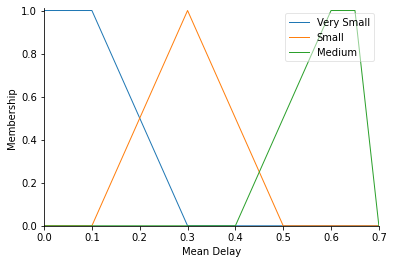

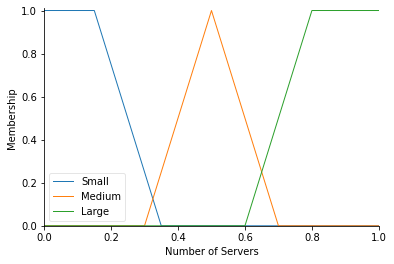

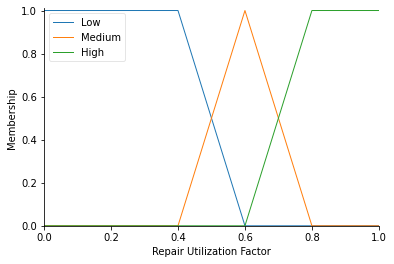

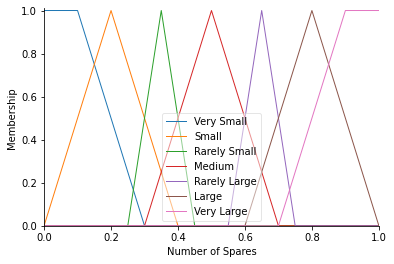

In [5]:
m . view()
s . view()
p . view()
n . view()

In [6]:
rule1 = ctrl . Rule(p[ 'Low' ],n[ 'Small' ])
rule2 = ctrl . Rule(p[ 'Medium' ],n[ 'Medium' ])
rule3 = ctrl . Rule(p[ 'High' ],n[ 'Large' ])
rule4 = ctrl . Rule(m[ 'Very Small' ] & s[ 'Small' ],n[ 'Very Large' ])
rule5 = ctrl . Rule(m[ 'Small' ] & s[ 'Small' ],n[ 'Large' ])
rule6 = ctrl . Rule(m[ 'Medium' ] & s[ 'Small' ],n[ 'Medium' ])
rule7 = ctrl . Rule(m[ 'Very Small' ] & s[ 'Medium' ],n[ 'Rarely Large' ])
rule8 = ctrl . Rule(m[ 'Small' ] & s[ 'Medium' ],n[ 'Rarely Small' ])
rule9 = ctrl . Rule(m[ 'Medium' ] & s[ 'Medium' ],n[ 'Small' ])
rule10 = ctrl . Rule(m[ 'Very Small' ] & s[ 'Large' ],n[ 'Medium' ])
rule11 = ctrl . Rule(m[ 'Small' ] & s[ 'Large' ],n[ 'Small' ])
rule12 = ctrl . Rule(m[ 'Medium' ] & s[ 'Large' ],n[ 'Very Small' ])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4717897150>)

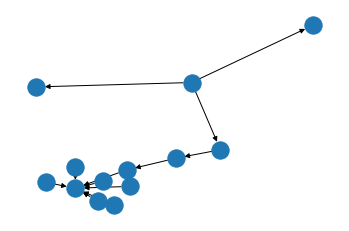

In [9]:
rule1 . view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f47178b27d0>)

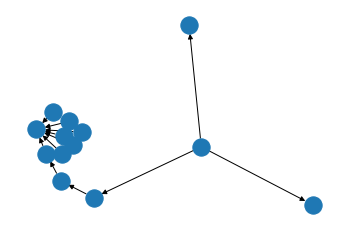

In [10]:
rule2 . view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4717798950>)

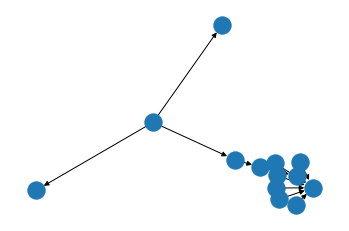

In [11]:
rule3 . view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f471778f3d0>)

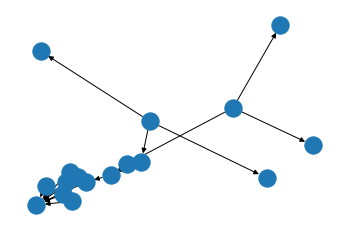

In [12]:
rule4 . view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4717706ed0>)

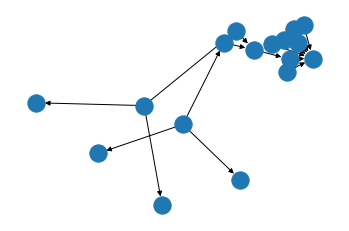

In [13]:
rule5 . view()

**Input:** Mean Delay, Number of Servers, Repair Utilization Factor

**Output:** Number of Spares

0.28863636363636364


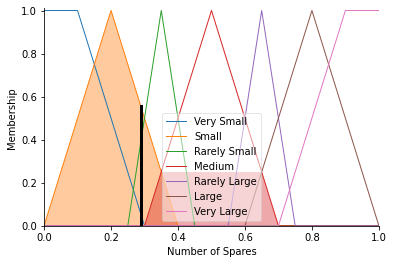

In [14]:
ServiceCentre_ctrl = ctrl . ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
ServiceCentre = ctrl . ControlSystemSimulation(ServiceCentre_ctrl )

ServiceCentre . input[ 'Mean Delay' ] = 0.5
ServiceCentre . input[ 'Number of Servers' ] = 0.3
ServiceCentre . input[ 'Repair Utilization Factor' ] = 0.2

ServiceCentre . compute()
print (ServiceCentre . output[ 'Number of Spares' ])
n . view(sim = ServiceCentre)